# Introduction & Motivation

The dataset "ABNYC2019" includs a summary information of Airbnb listings in New York City of the year 2019. Dataset includes 448895 records and 16 columns. 

With the dataset, some general questions are explored and addressed:

* Who are the owners of the listed homes? (Colume: host_id, price, minimum_nights)
* How are the homes located?(Columes: neighbourhood_group, neighbourhood, pirce, room_type)
* What are the other features of the homes? (Columes: number_of_reviews,availability_365)

This study tries to answer the questions by forming a bird's eye view of the overall airbnb market of New York city of 2019 through some exploitory data analysis. Throughout the study, Python packages such as Pandas, Numpy, Seaborn, Matplotlib and WordCloud are mainly used to for data exploration, analysis and visualization. Based on the analysis, some business strategic thought are generated at the end of the study.


# Content:

1. Preparation
    *     1.1 Package importation
    *     1.2 Data importation
2. Data Observation & Cleaning
    *     2.1 Obeservations
    *     2.2 Missing data check
3. Data Analysis
    *     3.1 Hot Hosts 
    *     3.2 Location! Location! Location!
    *     3.3 Other home features
4. Summary

# 1.Preparation

**1.1 Package importation:**

In [1]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import collections
%matplotlib inline

**1.2 Data Importation**


In [2]:
# use pandas .read_csv()method to import the csv file.
airbnb = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
type(airbnb)

pandas.core.frame.DataFrame

# 2. Data Observation & Cleaning

2.1 Data Observation

In [3]:
#We want to see the shape of the DataFrame:
airbnb.shape
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#Then we want to know the data type of each column of the DataFrame
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
#We want to know see if there is any null content
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From the .shape output, we know that the dataframe is (48895, 16), so here we learn that, the column:"name","host_name","last_review","review_per_month" has some null values. Then in the next step we will deal with them.

In [6]:
#Now we are checking the total number of null values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
#We are dropping some unnecessary columns, since we are not likely to use "id", "host_name" and "last_review".
#When inplace argument is True, the columns will be dropped from the original dataframe. If False is assigned to inplace, the original dataframe is not changed, and the new result should be assigned to a new variable.
airbnb.drop(["last_review"],axis = 1, inplace=True)

In [8]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#Then we see the first 5 rows of the dataframe
airbnb.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [10]:
airbnb.fillna(0,inplace=True)

In [11]:
airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# 3. Data Analysis

Now the data are ready to be analyzed. Before diving into the details, we firstly want to check the relationship of the numerical columns to see if there's interesting linkage worth further research.


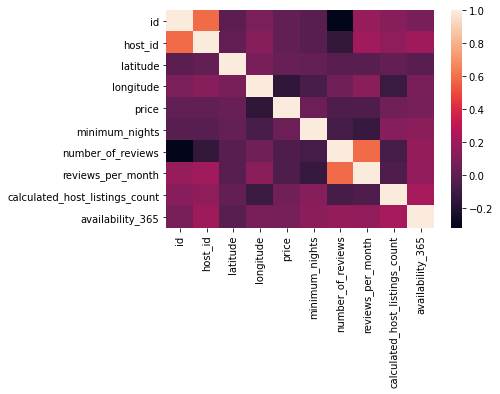

In [12]:
sns.heatmap(airbnb.corr())

Observed from the correlation heatmap that the most of correlation coefficients are lower than 0.5, which are not very significant at the first glance, so we will keep it in mind and continue with study mostly on column bases.

3.1 Hot Hosts

Now we begin the analysis by checking the hosts of the listed airbnb homes of New York city in 2019.

Here are the things we are interested to know:
    * Who are the owners of the listed homes?
    * Who are the top 10 hosts?


In [13]:
#First we want to see how many unique hosts are there.

len(airbnb["host_id"].unique())

37457

In [14]:
#Then we are checking how many homes do the hosts hold
host_lst = airbnb["host_id"].tolist()
ms = collections.Counter(host_lst).most_common(11)
top_host_id = [x[0] for x in ms]
ms_all = collections.Counter(host_lst).most_common()
host_id_lst = [x[0] for x in ms]
ms

[(219517861, 327),
 (107434423, 232),
 (30283594, 121),
 (137358866, 103),
 (16098958, 96),
 (12243051, 96),
 (61391963, 91),
 (22541573, 87),
 (200380610, 65),
 (1475015, 52),
 (7503643, 52)]

Here we know that there are some hosts hold multiple homes, then we will dive a bit deeper to look at information about those hosts.

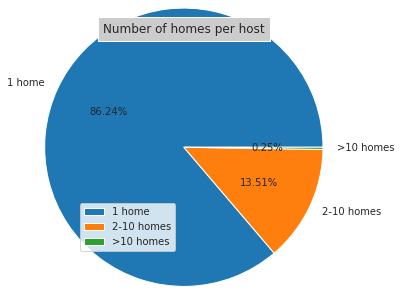

In [15]:
sns.set_style("white")
abb_host_s = airbnb["host_id"].value_counts()
bins = [0,1,10,1000000]
labels = ['1 home','2-10 homes','>10 homes']
abb_host_s['host_cat'] = pd.cut(abb_host_s, bins=bins, labels=labels)

plt.pie(abb_host_s['host_cat'].value_counts(), labels = labels, autopct = "%0.2f%%", radius = 1.6)
plt.legend(loc="lower left")
plt.title("Number of homes per host", bbox={'facecolor':'0.8', 'pad':5}, loc = "center")
plt.show()

Learned from the pie chart we know that:
- 86% of the home owner owns only one home;
- 13.5% own 2-10 homes
- less than 1% own >10 homes

Then we are interested in if there is price differences among the 3 different home groups:

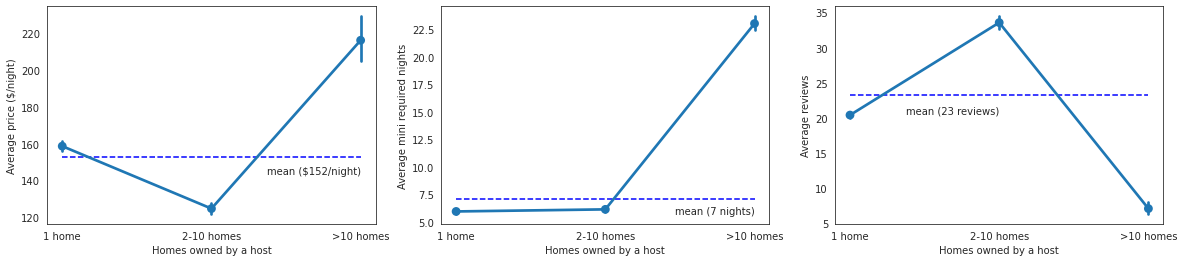

In [16]:
abb_host_df = airbnb
bins = [0,1,10,1000000]
labels = ['1 home','2-10 homes','>10 homes']
abb_host_df['host_cat'] = pd.cut(abb_host_df['calculated_host_listings_count'], bins=bins, labels=labels)

fig,(ax0, ax1, ax2) = plt.subplots(nrows =1, ncols = 3, figsize = (20,4))

sns.pointplot(x="host_cat" ,y="price", data=abb_host_df, ax=ax0)
ax0.hlines(y=airbnb['price'].mean(), xmin=0.0, xmax=2.0, color='b', linestyle ="--")
ax0.text(2,145, 'mean ($152/night)', ha='right', va='center')
ax0.set(xlabel = "Homes owned by a host", ylabel = "Average price ($/night)")


sns.pointplot(x="host_cat" ,y="minimum_nights", data=abb_host_df, ax=ax1)
ax1.hlines(y=airbnb['minimum_nights'].mean(), xmin=0.0, xmax=2.0, color='b', linestyle ="--")
ax1.text(2,6, 'mean (7 nights)', ha='right', va='center')
ax1.set(xlabel = "Homes owned by a host", ylabel = "Average mini required nights")

sns.pointplot(x="host_cat" ,y="number_of_reviews", data=abb_host_df, ax=ax2)
ax2.hlines(y=airbnb['number_of_reviews'].mean(), xmin=0.0, xmax=2.0, color='b', linestyle ="--")
ax2.text(1,21, 'mean (23 reviews)', ha='right', va='center')
ax2.set(xlabel = "Homes owned by a host", ylabel = "Average reviews")


plt.show()

Now we know that:
* Homes owned by big owners (those owned > 10 homes) have a higher average price than the homes owned by individual owners.  
* Such homes required a longer minimum stay and have fewer reviews.
Then we may check those owners' info in details.

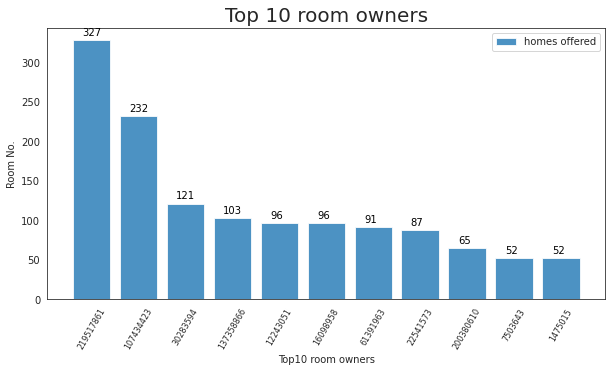

In [17]:
#visualizing the top hosts using bar chart
top_host = airbnb["host_id"].value_counts().head(11)
top_host_df1=pd.DataFrame(top_host)

fig,ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.bar(range(11),top_host_df1["host_id"], label="homes offered", tick_label= range(11),alpha = 0.8)
ax.set_xticklabels(top_host_df1.index,rotation = 60, size = 8)
ax.set_title('Top 10 room owners', size = 20)
ax.set_xlabel("Top10 room owners", size =10)
ax.set_ylabel("Room No.")
for i, v in enumerate(top_host_df1["host_id"]):
    ax.text(i-0.2,v+6,str(v), color='black')
ax.legend()
plt.show()

In [18]:
#Now we want to see who are the big owners
#top_host_id = [x[0] for x in ms]
hot_host_names = airbnb[airbnb['host_id'].isin(top_host_id)]["host_name"].tolist()
collections.Counter(hot_host_names).most_common(11)

[('Sonder (NYC)', 327),
 ('Blueground', 232),
 ('Kara', 121),
 ('Kazuya', 103),
 ('Jeremy & Laura', 96),
 ('Sonder', 96),
 ('Corporate Housing', 91),
 ('Ken', 87),
 ('Pranjal', 65),
 ('Mike', 52),
 ('Vida', 52)]

From the above list we get to know that, some of the biggest holders are professional business entities, instead of individuals.
Such as:
* Sonder: https://www.sonder.com/
* Blueground: https://www.theblueground.com/
* Corporate Housing : https://www.corporatehousing.com/ny/new-york

And learned from Blueground's website that: *The real estate technology company sees Airbnb as a complimentary listing channel rather than a direct competitor.And If Airbnb is a marketplace for hosts and guests to connect for short stays, then Blueground is a single host specializing in a complete guest experience for stays of a month or more. * (https://landlord-resources.theblueground.com/property-management/blueground-vs-airbnb/) 

Our data can also support that, the homes offered by these big owners have higher average prices and require longer stays.

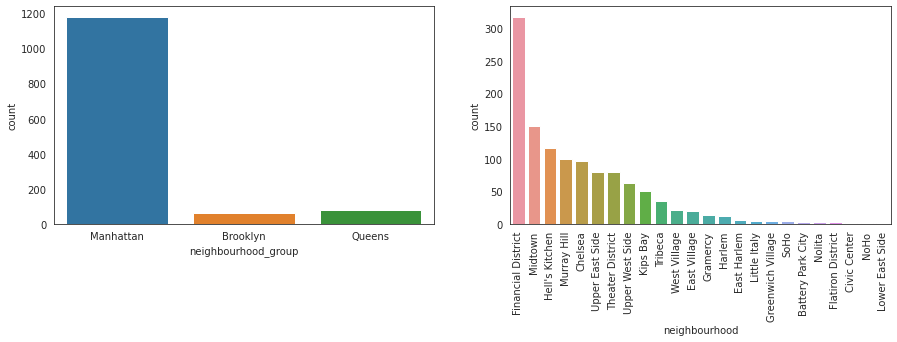

In [19]:
# Check the region of the homes of the big owners
tophost_df = airbnb[airbnb["host_id"].isin(top_host_id)]

fig,(ax0, ax1) = plt.subplots(nrows =1, ncols = 2, figsize = (15,4))
sns.countplot(tophost_df["neighbourhood_group"], ax = ax0)
sns.countplot(tophost_df[tophost_df["neighbourhood_group"] == "Manhattan"]["neighbourhood"], order=tophost_df[tophost_df["neighbourhood_group"] == "Manhattan"]["neighbourhood"].value_counts().index, ax = ax1)
plt.xticks(rotation =90)
plt.show()

As we can see, most of the homes owned by big owners are in Manhattan, Financial District.

To sum up, from the analysis we can answer the questions we raised at the beginning:

    * Who are the owners of the listed homes?
      There are 37,457 (76.6%) unique hosts who holds the total 48,895 Airbnb homes. 
      On average, a host holds 1.3 homes, and 86% hosts are holding just one home.
    * Who are the top 10 hosts?
      There are about 0.25% (about 100 hosts with 1300 homes) hosts more than 10 homes.
      Top 10 hosts include some professional agencies, whoes homes are mostly in Manhattan with higher average price and longer stay requirement.


3.2 Location! Location! Location!

As we know location usually plays an important role in the supplies and price of real-estate properties, as it almost can represent the demand of the market. For airbnb this could be especially true as whose customers are mostly travelors who weigh convinience heavily making decisions.

Now we move to the neighbourhood columns, there are some questions we want to know:

    * How many homes does each neighbourhood have?
    * How are the prices allocated in different neighbourhood?

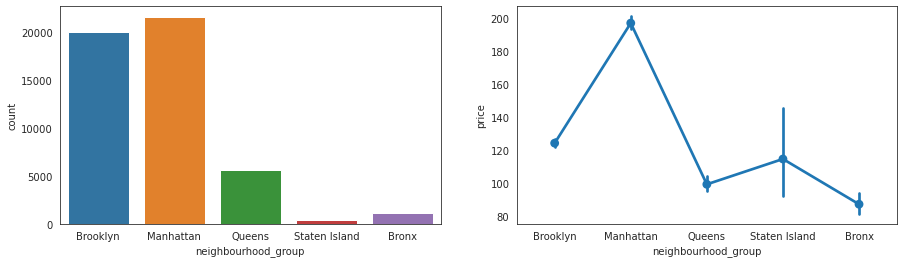

In [20]:
#Check the supply and price of the homes across different regions
fig,(ax0, ax1) = plt.subplots(nrows =1, ncols = 2, figsize = (15,4))

sns.countplot(x="neighbourhood_group", data=airbnb, ax = ax0)
sns.pointplot(x="neighbourhood_group" ,y="price", data=airbnb, ax = ax1)
plt.show()

In [21]:
airbnb.groupby('neighbourhood_group')["price"].agg('mean')

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [22]:
airbnb.groupby('neighbourhood_group')['name'].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: name, dtype: int64

Learned from above that most homes are located in Manhattan and Brooklyn, with about 20,000 homes respectively; while Manhattan has the highest average price, about $200/night. 

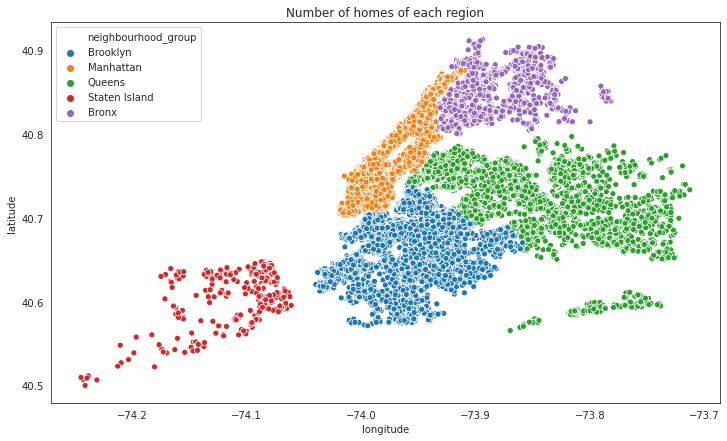

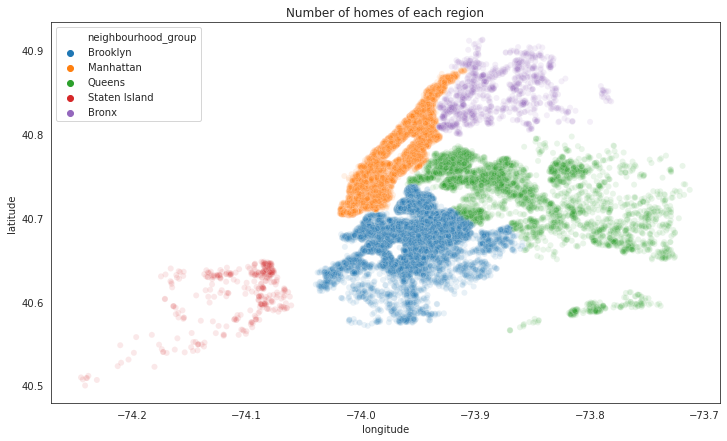

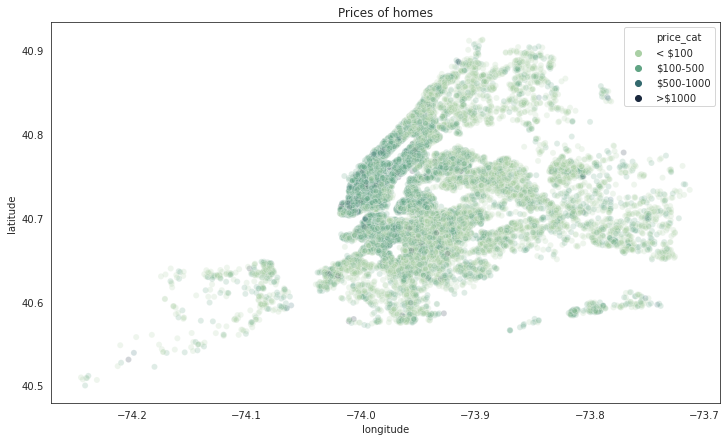

In [23]:
#Then we are going to visualize the geomatric distribution of the homes and prices

plt.figure(figsize = (12,7))
sns.scatterplot(x="longitude" ,y="latitude", data=airbnb, hue = "neighbourhood_group", alpha = 1)
plt.title("Number of homes of each region")
plt.show()

plt.figure(figsize = (12,7))
sns.scatterplot(x="longitude" ,y="latitude", data=airbnb, hue = "neighbourhood_group", alpha = 0.1)
plt.title("Number of homes of each region")
plt.show()

airbnb_6 = airbnb
bins = [0,100,500,1000,100000]
labels = ['< $100', '$100-500','$500-1000','>$1000']
airbnb_6['price_cat'] = pd.cut(airbnb_6["price"], bins=bins, labels=labels)
plt.figure(figsize = (12,7))
sns.scatterplot(x="longitude" ,y="latitude", data=airbnb_6, hue = 'price_cat', palette="ch:r=-.5,l=.75",hue_order = ['< $100', '$100-500','$500-1000','>$1000'],alpha = 0.2)
plt.title("Prices of homes")
plt.show()


From the above we can see that homes are more concentrated in within the whole area of Manhattan, and north of Brooklyn and west of Queens.
Expensive homes are mostly located in Manhattan & north of Brooklyn.

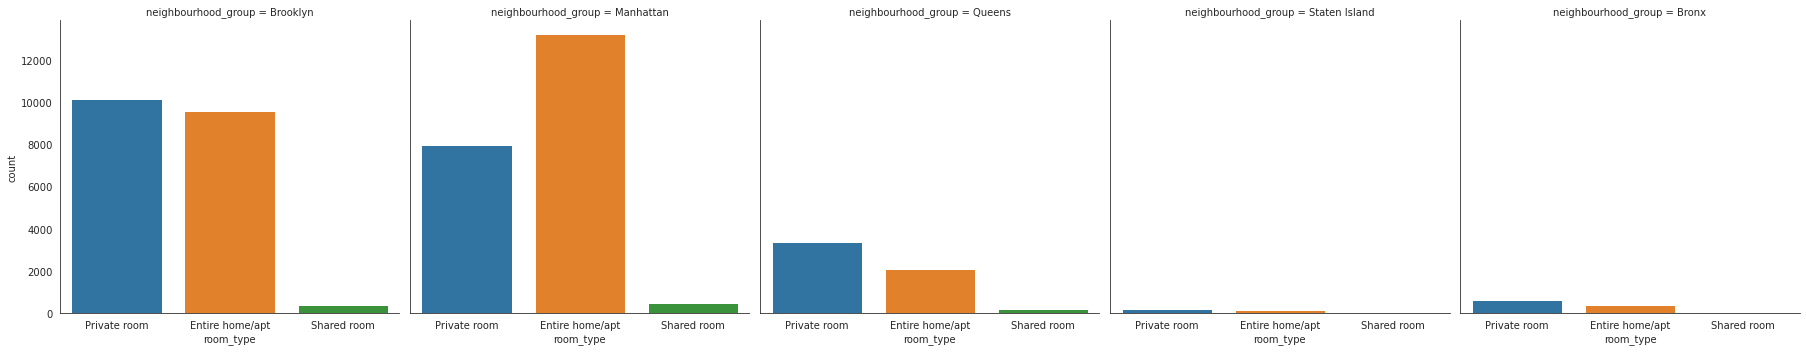

In [24]:
#Then we are going to compare the supplies of different room types across the areas.
sns.catplot(x="room_type",data=airbnb, kind="count", col = "neighbourhood_group")
plt.show()

We can see that the supply of private rooms and entire home are almost the same; while there are more entire home than private rooms.

 To sum up, in this section we analyzed the home and prices distribution in 5 different neighbourhood_group and anwsered questions as below:
*  How many homes does each neighbourhood have?
   Most homes are located in Manhattan and Brooklyn, with about 20,000 homes respectively;
*  How are the prices allocated in different neighbourhood?
   Manhattan has the highest average price, about $200/night, and most expensive homes are located in Manhattan & north of Brooklyn.

3.3 Other Home features

In this section we will mainly check how the reviews look like and the status of the availability of the homes.

We will firstly have a look at the reviews of the homes

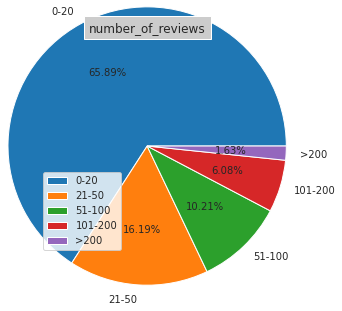

In [25]:
#Check the volume of reviews
airbnb_2 = airbnb
airbnb_2["number_of_reviews"] = airbnb_2["number_of_reviews"].astype(int)
bins = [0,20,50,100,200,1000000]
labels = ['0-20','21-50','51-100','101-200','>200']
airbnb_2['review_cat'] = pd.cut(airbnb_2["number_of_reviews"], bins=bins, labels=labels)
airbnb_2.head()
#sns.countplot(airbnb_1['review_cat'])
plt.figure(figsize=(6,4))

plt.pie(airbnb_2['review_cat'].value_counts(), labels = labels, autopct = "%0.2f%%", radius = 1.6)
plt.legend(loc="lower left")
plt.title("number_of_reviews", bbox={'facecolor':'0.8', 'pad':5}, loc = "center")
plt.show()


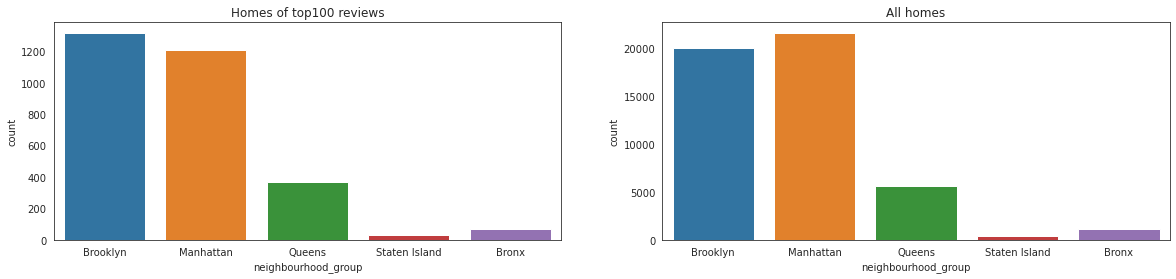

In [26]:
top_review_df= airbnb[airbnb["number_of_reviews"]>100]
fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20,4))
sns.countplot(top_review_df["neighbourhood_group"], ax=ax0)
#top_review_df["neighbourhood_group"]
sns.countplot(airbnb["neighbourhood_group"], ax = ax1)
ax0.set_title("Homes of top100 reviews")
ax1.set_title("All homes")
plt.show()

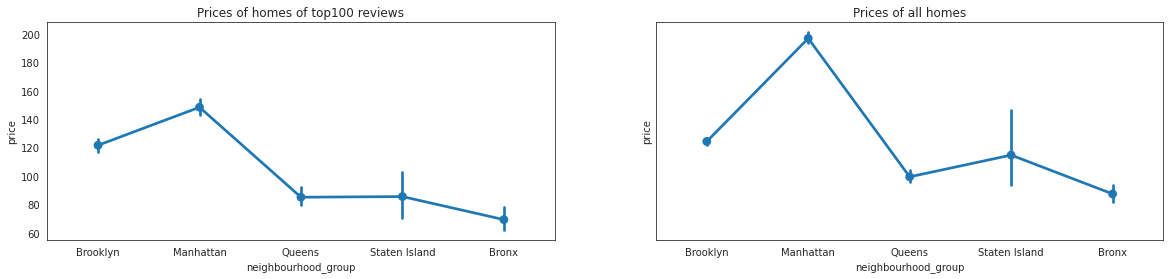

In [27]:
fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20,4))
sns.pointplot(x="neighbourhood_group",y="price", data=top_review_df, ax = ax0)
sns.pointplot(x="neighbourhood_group",y="price", data=airbnb, ax = ax1)
ax0.set_title("Prices of homes of top100 reviews")
ax1.set_title("Prices of all homes")
plt.show()

From the above analysis we can see that:
1. 66% of the homes have 0-20 reviews; 16% have 20-50 reviews. And the average number if reviews is 23.27.
2. The distribution of homes with most reviews is similar to the one overall homes distribution.
3. The average prices of mostly reviewed homes are lower than the overall averages.

Then we continue to check the feature of the minimum nights required and the availability of the homes.

NameError: name 'airbnb_3' is not defined

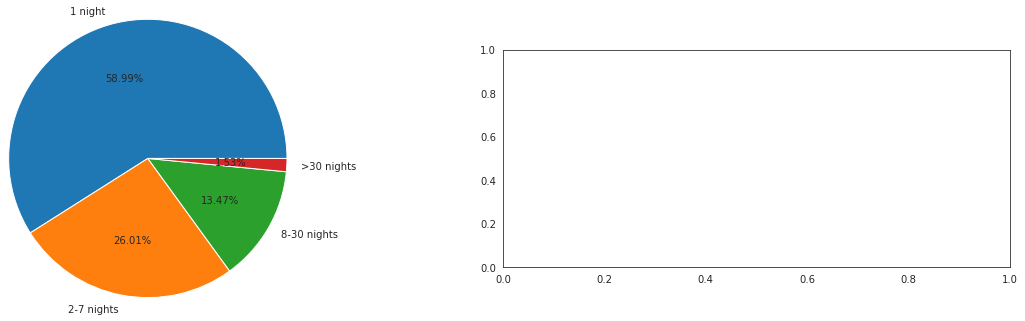

In [28]:
airbnb_1 = airbnb
bins = [0,1,7,30,100000]
labels = ['1 night', '2-7 nights','8-30 nights','>30 nights']
airbnb_1['night_cat'] = pd.cut(airbnb_1["minimum_nights"], bins=bins, labels=labels)

fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20,4))

ax0.pie(airbnb_1['night_cat'].value_counts(), labels = labels, autopct = "%0.2f%%", radius = 1.6)
sns.pointplot(x='night_cat',y="price", data=airbnb_3, ax = ax1)
plt.show()

Minimum nights: about 58% of the homes required 1 night as the minimum stay, long-term minimum stay (>30 days) homes are priced higher. 

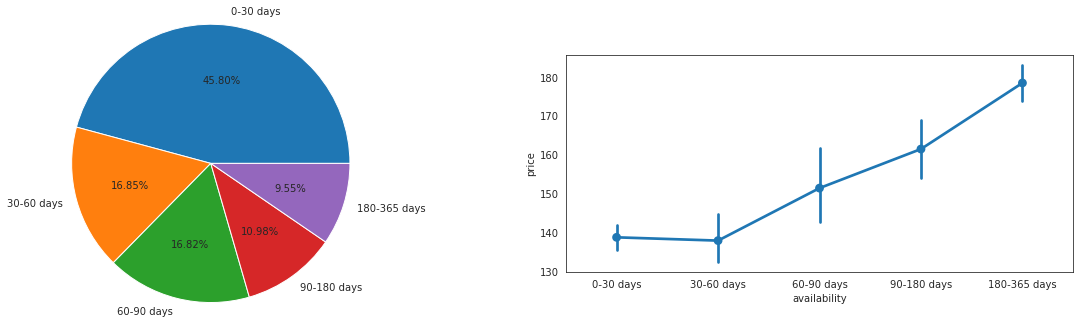

In [29]:
airbnb_3 = airbnb
bins = [0,30,60,90,180,365]
labels = ['0-30 days', '30-60 days','60-90 days','90-180 days','180-365 days']
airbnb_3['availability'] = pd.cut(airbnb_1["availability_365"], bins=bins, labels=labels)

fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20,4))

ax0.pie(airbnb_3['availability'].value_counts(), labels = labels, autopct = "%0.2f%%", radius = 1.6 )
sns.pointplot(x='availability',y="price", data=airbnb_3, ax = ax1)
plt.show()

Availability: about 45% of the homes are available for 0-30 days, 34% for 30-90 days, here we can see that the majority of the homes are not available all-year-around. Price-wise, the average price of different groups indicate that longer availability tends to have higher prices.

Finally, we want to have a look at the names of the listed homes, so we can have a rough idea of how hosts would advertise themselves.

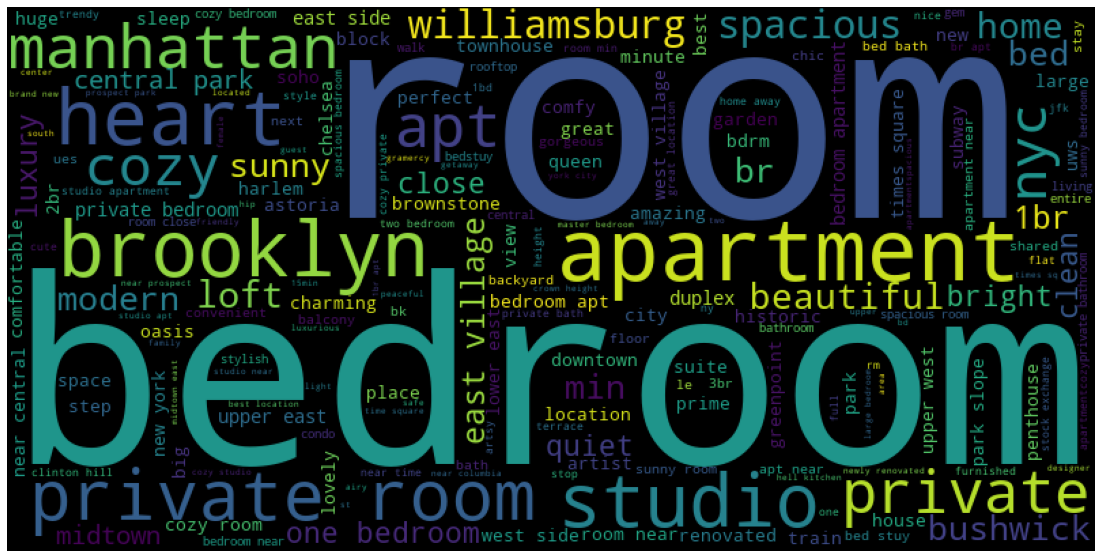

In [30]:
name_lst = airbnb['name'].tolist()
text = ""
for item in name_lst:
    text += str(item).lower()
wordcloud = WordCloud(width = 800, height = 400).generate(text)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
    

The wordcloud tells us that location is big sell: central park, williamsburg, manhattan, midtown, upper esat, etc.
And some adjectives are also frequently used: cozy, bright, spacious, quiet, sunny, clean, etc.

# 4. Summary


Through the project, we firstly analyzed the host information, and found that though most of the hosts are individual owners, still there are a few proessional real-estate agencies hold plenty of homes, which are pricier, required longer stay and has fewer reviews. Learned from the some agency's website that those agencies operates similarly to airbnb but with smaller size, and used airbnb as a listing chanel. So for those agencies, airbnb may consider to adjust the commission as one one hand to increase the revenue and on the other to balance the protection of the individual hosts. Secondly we digged a bit on the neiboughhood infomation, we found that homes, especially expensive ones are more concentrated within the whole area of Manhattan, and north of Brooklyn and west of Queens. So when considering branding and marketing activities, airbnb can consider to pick those locations which can represent the airbnb culcure; in addition since airbnb hosts are densly distributed in such regions, airbnb should also pay close attention on local regulations to avoild potential suspention risks. Last we checked some features of the homes, such as number of reviews, minimum nights required, and availibility. We noticed that most reviewed homes tend to be less expensive ones, which attracted more attentions. So airbnb can consider to further analyze the content of the reviews, for instance, by studying the review sensitivity to further find out the influencers in the community and consider support or bonus.